In [ ]:
pip install yfinance

In [ ]:
pip install pandas_datareader

In [4]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt

In [24]:
tickers = ['MSFT', 'AAPL', 'IBM']
start_date = dt.datetime(2020, 1, 1)
end_date = dt.datetime(2024, 1, 1)

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [25]:
data

Ticker,AAPL,IBM,MSFT
Date,,,
2020-01-02,73.059433,105.346321,154.493820
2020-01-03,72.349152,104.506187,152.570129
2020-01-06,72.925636,104.319496,152.964462
2020-01-07,72.582649,104.389496,151.569794
2020-01-08,73.750244,105.260765,153.984070
...,...,...,...
2023-12-22,193.353287,160.675140,373.888580
2023-12-26,192.803986,161.735489,373.968445
2023-12-27,192.903839,161.983231,373.379547


In [39]:
# calculate daily returns
returns = data.pct_change().dropna()

<Axes: xlabel='Date'>

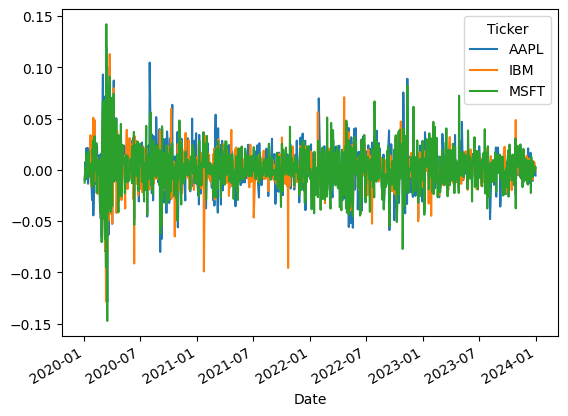

In [40]:
returns.plot()

In [28]:
# covariance matrix
cov_mat = returns.cov()

In [29]:
# portfolio weights
weights = [0.25, 0.50, 0.25]

**Steps to Calculate VaR Using the z-score:**

**Step 1:** Calculate the portfolio mean return and standard deviation.

**Step 2:** Determine the critical z-value corresponding to the desired confidence level (e.g., 95%).

**Step 3:** Multiply the standard deviation by the z-score to find the VaR.

In [30]:
# portfolio mean return and std
port_mean_return = np.dot(weights, returns.mean())
port_std_dev = np.sqrt(weights, np.dot(cov_mat, weights))

In [15]:
# set confidence level
conf = 0.95

In [42]:
# calculate VaR

z_score = np.abs(np.percentile(returns, 100*(1-conf)))
initial_investment = 100000
VaR_portfolio = initial_investment * (port_mean_return - z_score * port_std_dev)


In [43]:
VaR_portfolio

array([-1381.88409564, -1989.89687318, -1381.88409564])

**The Role of the z-score:**

The z-score, also known as the standard score, measures how many standard deviations a data point is from the mean.
In VaR calculations, we use the z-score to find the critical value corresponding to the desired confidence level.

**Normal Distribution Assumption:**
The variance-covariance method assumes that portfolio returns follow a normal distribution.
Under this assumption, we can use the z-score to find the VaR.